## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

### Loading our dataset using pandas library

In [2]:
airlines_dataset = pd.read_csv('airlines_final.csv', skipinitialspace=True)

## Data Overview

#### We look quickly on our data using pandas dataframe method, i.e ('head' and 'tail')

In [3]:
airlines_dataset.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,31-12-18,115,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,31-12-18,135,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,31-12-18,70,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,31-12-18,190,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,31-12-18,559,Somewhat clean,Very safe,Somewhat satsified


In [4]:
airlines_dataset.tail()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,31-12-18,280,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,31-12-18,165,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,31-12-18,92,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,31-12-18,95,Clean,Somewhat safe,Very satisfied
2476,2162,Saturday,CHINA EASTERN,QINGDAO,Asia,Large,Gates 1-12,31-12-18,220,Clean,Very safe,Somewhat satsified


In [5]:
airlines_dataset.shape

(2477, 12)

#### We try to know information about our data like its type and nulls using 'info' funtion

In [6]:
airlines_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2477 non-null   int64 
 1   day            2477 non-null   object
 2   airline        2477 non-null   object
 3   destination    2477 non-null   object
 4   dest_region    2477 non-null   object
 5   dest_size      2477 non-null   object
 6   boarding_area  2477 non-null   object
 7   dept_time      2477 non-null   object
 8   wait_min       2477 non-null   int64 
 9   cleanliness    2477 non-null   object
 10  safety         2477 non-null   object
 11  satisfaction   2477 non-null   object
dtypes: int64(2), object(10)
memory usage: 232.3+ KB


## Data Cleansing

##### We now are checking nulls using the 'is null' funtions and the 'sum' method

In [7]:
airlines_dataset.isna().sum()

id               0
day              0
airline          0
destination      0
dest_region      0
dest_size        0
boarding_area    0
dept_time        0
wait_min         0
cleanliness      0
safety           0
satisfaction     0
dtype: int64

#### We check duplication using the function 'duplicated'

In [8]:
airlines_dataset.duplicated().sum()

0

##### So we found out that our data is clean

## Data analysis

#### Checking value count on our various data categories

In [9]:
airlines_dataset.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,31-12-18,115,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,31-12-18,135,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,31-12-18,70,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,31-12-18,190,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,31-12-18,559,Somewhat clean,Very safe,Somewhat satsified


In [10]:
airlines_dataset['day'].value_counts()

Tuesday      535
Wednesday    518
Thursday     488
Friday       368
Sunday       267
Saturday     210
Monday        91
Name: day, dtype: int64

In [11]:
airlines_dataset['dept_time'].value_counts()

31-12-18    2440
01-01-18      37
Name: dept_time, dtype: int64

In [12]:
airlines_dataset['destination'].value_counts()

LOS ANGELES        185
PARIS-DE GAULLE    126
DENVER              96
HONG KONG           95
LONDON HEATHROW     91
                  ... 
WUHAN                4
ONTARIO (CALIF)      3
NEW ORLEANS          3
QINGDAO              3
EUGENE               1
Name: destination, Length: 72, dtype: int64

In [13]:
airlines_dataset['airline'].value_counts()

UNITED                 526
ALASKA                 315
SOUTHWEST              184
AMERICAN               175
DELTA                  170
UNITED INTL            155
JETBLUE                144
AIR CANADA             133
AIR FRANCE/KLM         120
CATHAY PACIFIC          81
LUFTHANSA               64
FRONTIER                41
EMIRATES                39
WOW                     38
VIRGIN ATLANTIC         32
TURKISH AIRLINES        30
QANTAS                  28
AIR NEW ZEALAND         21
BRITISH AIRWAYS         21
INTERJET                18
AER LINGUS              18
SINGAPORE AIRLINES      16
COPA                    16
PHILIPPINE AIRLINES     14
CHINA EASTERN           13
HAWAIIAN AIR            12
KOREAN AIR              12
AEROMEXICO              11
EVA AIR                 10
AIR CHINA                8
AVIANCA                  6
CHINA SOUTHERN           4
ANA ALL NIPPON           2
Name: airline, dtype: int64

In [14]:
airlines_dataset['dest_region'].value_counts()

West US                  864
East US                  367
Europe                   272
Midwest US               251
Asia                     226
Canada/Mexico            198
eur                       79
EAST US                   69
Australia/New Zealand     60
Middle East               48
Central/South America     22
middle east               21
Name: dest_region, dtype: int64

In [15]:
airlines_dataset['safety'].value_counts()

Very safe          1296
Somewhat safe       864
Neutral             303
Very unsafe           8
Somewhat unsafe       6
Name: safety, dtype: int64

In [16]:
airlines_dataset['cleanliness'].value_counts()

Somewhat clean    1173
Clean              884
Average            388
Somewhat dirty      26
Dirty                2
Bomm                 1
Nasty                1
Don't know           1
foolish              1
Name: cleanliness, dtype: int64

In [17]:
airlines_dataset['satisfaction'].value_counts()

Somewhat satsified      1349
Very satisfied           596
Neutral                  486
Somewhat unsatisfied      42
Very unsatisfied           4
Name: satisfaction, dtype: int64

In [18]:
top10_airlines = ['UNITED', 'ALASKA', 'SOUTHWEST', 'AMERICAN', 'DELTA', 'UNITED INTL', 'JETBLUE', 'AIR CANADA', 'AIR FRANCE/KLM', 
                  'CATHAY PACIFIC']
len(top10_airlines)

10

In [19]:
new_airlines_dataset = airlines_dataset[airlines_dataset.airline.isin(top10_airlines)]
new_airlines_dataset

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,31-12-18,115,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,31-12-18,135,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,31-12-18,70,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,31-12-18,190,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,31-12-18,559,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2888,Wednesday,UNITED,AUSTIN,Midwest US,Medium,Gates 70-90,31-12-18,60,Somewhat clean,Somewhat unsafe,Somewhat satsified
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,31-12-18,280,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,31-12-18,165,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,31-12-18,92,Clean,Very safe,Very satisfied


## Visualization

<AxesSubplot:xlabel='count', ylabel='safety'>

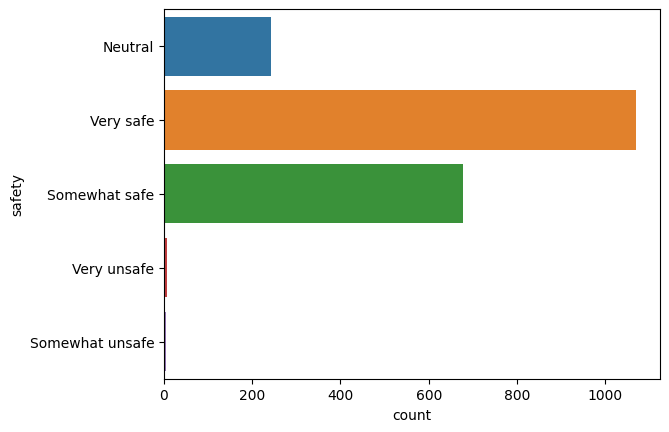

In [20]:
sns.countplot(new_airlines_dataset, y="safety")

Text(0.5, 1.0, 'Distribution of Very Satisfied Customers by Safety Rating')

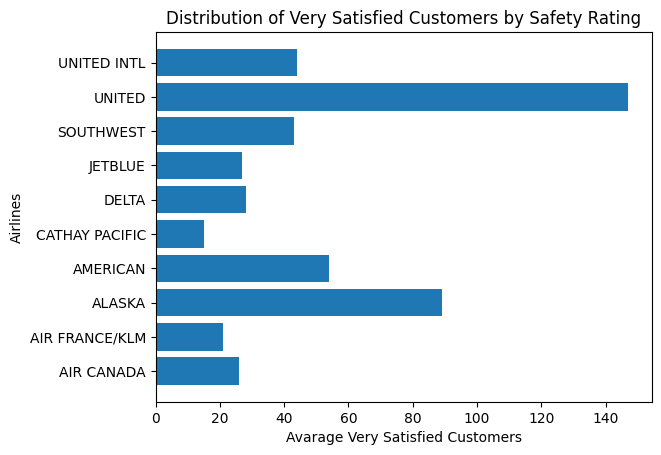

In [40]:
satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very satisfied']
satisfaction_by_ = satisfied_costumers.groupby('airline').count()['safety']
plt.barh(satisfaction_by_.index, satisfaction_by_.values)


# grp.size().plot(kind='bar')
plt.ylabel('Airlines')
plt.xlabel('Avarage Very Satisfied Customers')
plt.title('Distribution of Very Satisfied Customers by Safety Rating')

Text(0.5, 1.0, 'Distribution of Very Satisfied Customers by Safety Rating')

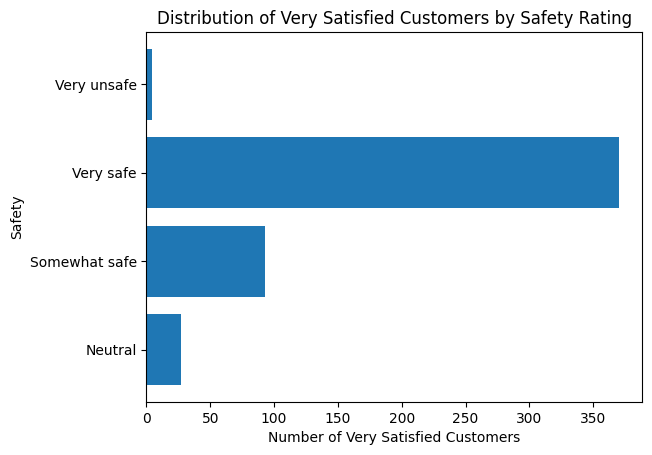

In [39]:
satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very satisfied']
satisfaction_by_ = satisfied_costumers.groupby('safety').count()['satisfaction']
plt.barh(satisfaction_by_.index, satisfaction_by_.values)


# grp.size().plot(kind='bar')
plt.ylabel('Safety')
plt.xlabel('Number of Very Satisfied Customers')
plt.title('Distribution of Very Satisfied Customers by Safety Rating')

Text(0.5, 1.0, 'Distribution of Somewhat satisfied Customers by Safety Rating')

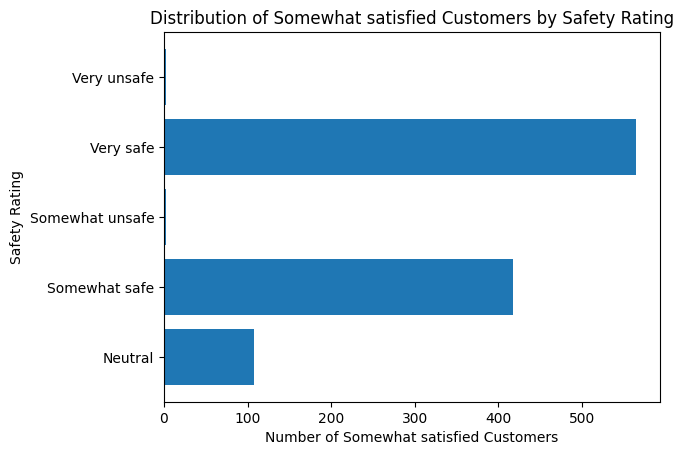

In [24]:
sw_satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Somewhat satsified']
satisfaction_by_b_a = sw_satisfied_costumers.groupby('safety').count()['satisfaction']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.ylabel('Safety Rating')
plt.xlabel('Number of Somewhat satisfied Customers')
plt.title('Distribution of Somewhat satisfied Customers by Safety Rating')

Text(0.5, 1.0, 'Distribution of Somewhat satisfied Customers by Safety Rating')

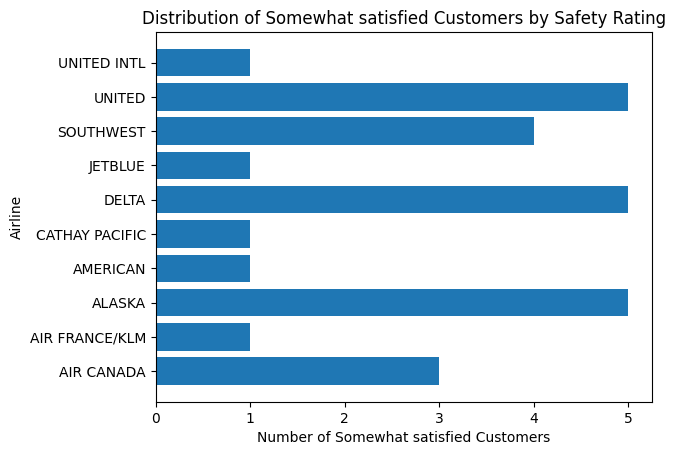

In [26]:
sw_unsatisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Somewhat unsatisfied']
satisfaction_by_b_a = sw_unsatisfied_costumers.groupby('airline').count()['safety']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# group.size().plot(kind='bar')
plt.ylabel('Airline')
plt.xlabel('Number of Somewhat satisfied Customers')
plt.title('Distribution of Somewhat satisfied Customers by Safety Rating')

Text(0.5, 1.0, 'Distribution of Neutral Customers by Safety Rating')

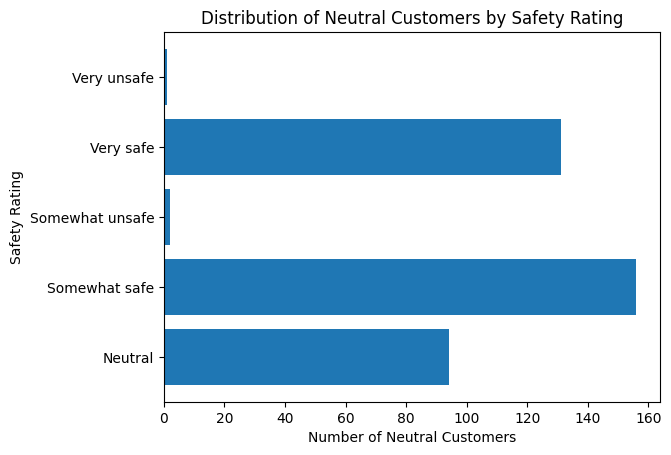

In [27]:
neutral_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Neutral']
satisfaction_by_b_a = neutral_costumers.groupby('safety').count()['satisfaction']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.ylabel('Safety Rating')
plt.xlabel('Number of Neutral Customers')
plt.title('Distribution of Neutral Customers by Safety Rating')

Text(0.5, 1.0, 'Distribution of Unsatisfied Customers by Safety Rating')

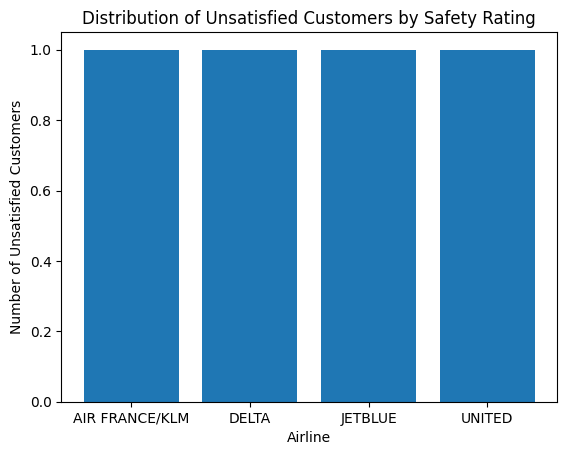

In [28]:
unsatisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very unsatisfied']
satisfaction_by_b_a = unsatisfied_costumers.groupby('airline').count()['safety']
plt.bar(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Number of Unsatisfied Customers')
plt.title('Distribution of Unsatisfied Customers by Safety Rating')

<AxesSubplot:xlabel='count', ylabel='cleanliness'>

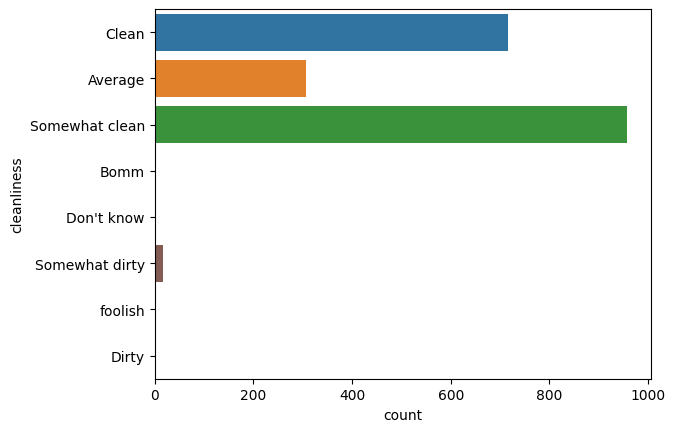

In [90]:
sns.countplot(new_airlines_dataset, y="cleanliness")

Text(0.5, 1.0, 'Distribution of Very Satisfied Customers by Cleanliness Rating')

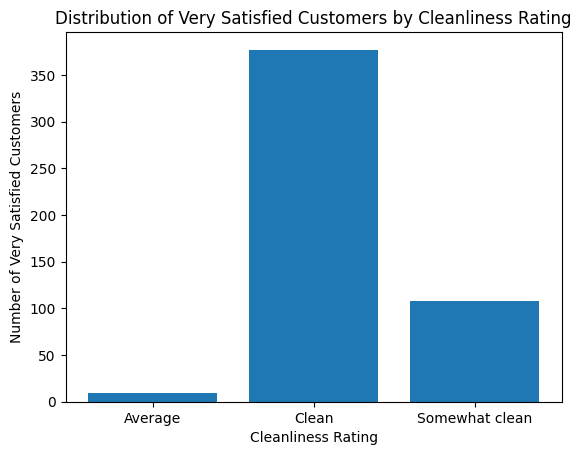

In [29]:
satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very satisfied']
satisfaction_by_ = satisfied_costumers.groupby('cleanliness').count()['satisfaction']
plt.bar(satisfaction_by_.index, satisfaction_by_.values)


# grp.size().plot(kind='bar')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Number of Very Satisfied Customers')
plt.title('Distribution of Very Satisfied Customers by Cleanliness Rating')

Text(0.5, 1.0, 'Distribution of Somewhat satisfied Customers by Cleanliness Rating')

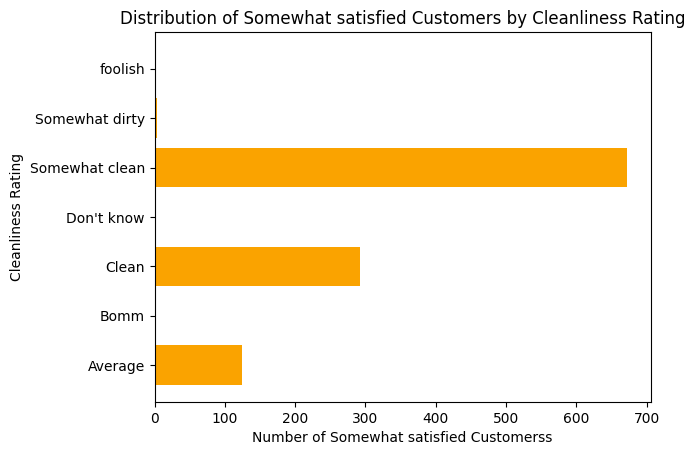

In [30]:
sw_satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Somewhat satsified']
satisfaction_by_b_a = sw_satisfied_costumers.groupby('cleanliness').count()['satisfaction']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values, color="#FAA300")


# grp.size().plot(kind='bar')
plt.ylabel('Cleanliness Rating')
plt.xlabel('Number of Somewhat satisfied Customerss')
plt.title('Distribution of Somewhat satisfied Customers by Cleanliness Rating')

Text(0.5, 1.0, 'Distribution of Somewhat satisfied Customers by Cleanliness Rating')

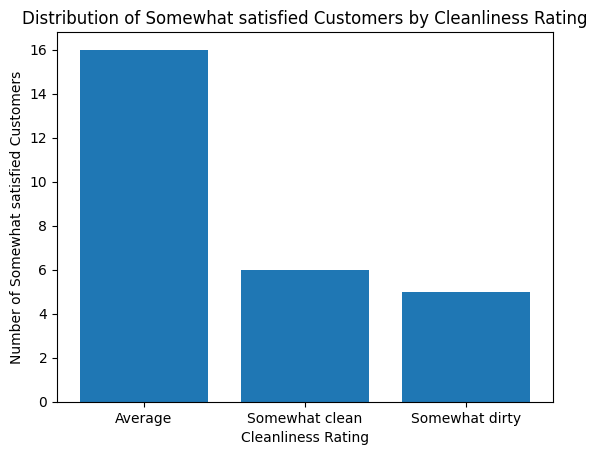

In [31]:
sw_unsatisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Somewhat unsatisfied']
satisfaction_by_b_a = sw_unsatisfied_costumers.groupby('cleanliness').count()['satisfaction']
plt.bar(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# group.size().plot(kind='bar')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Number of Somewhat satisfied Customers')
plt.title('Distribution of Somewhat satisfied Customers by Cleanliness Rating')

Text(0.5, 1.0, 'Distribution of Neutral Customers by Cleanliness Rating')

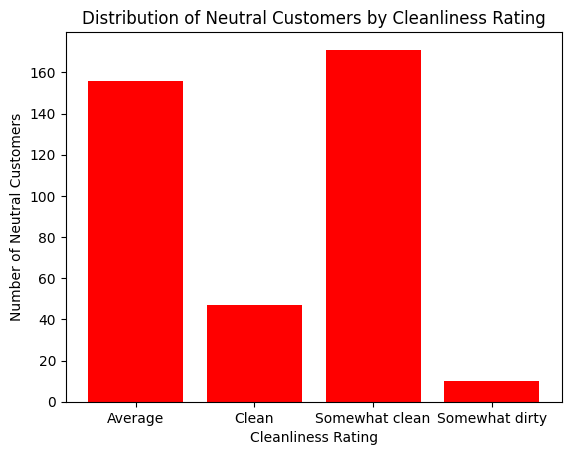

In [32]:
neutral_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Neutral']
satisfaction_by_b_a = neutral_costumers.groupby('cleanliness').count()['satisfaction']
plt.bar(satisfaction_by_b_a.index, satisfaction_by_b_a.values, color="red")


# grp.size().plot(kind='bar')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Number of Neutral Customers')
plt.title('Distribution of Neutral Customers by Cleanliness Rating')

Text(0.5, 1.0, 'Distribution of Unsatisfied Customers by Cleanliness Rating')

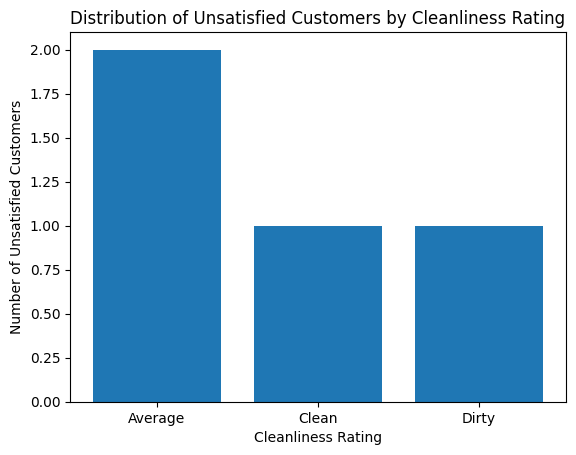

In [59]:
unsatisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very unsatisfied']
satisfaction_by_b_a = unsatisfied_costumers.groupby('cleanliness').count()['satisfaction']
plt.bar(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Number of Unsatisfied Customers')
plt.title('Distribution of Unsatisfied Customers by Cleanliness Rating')

In [21]:
# sns.countplot(new_airlines_dataset, y="boarding_area"  ,hue='satisfaction')

Text(0.5, 1.0, 'Distribution of Number of Customers by Boarding Area')

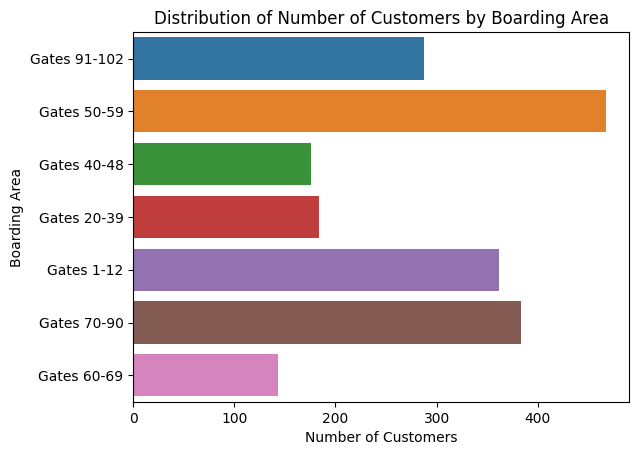

In [58]:

sns.countplot(y=new_airlines_dataset['boarding_area'])
plt.ylabel('Boarding Area')
plt.xlabel('Number of Customers')
plt.title('Distribution of Number of Customers by Boarding Area')

Text(0.5, 1.0, 'Distribution of Very Satisfied Customers by Boarding Area Rating')

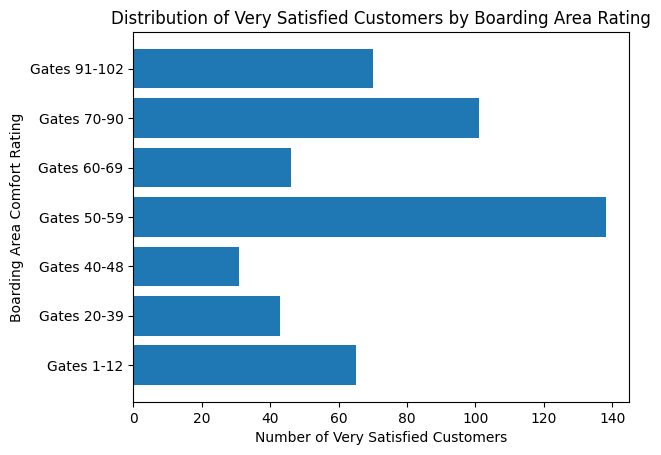

In [33]:
# how many satisfied  fall within each On-board service rates
satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very satisfied']
satisfaction_by_ = satisfied_costumers.groupby('boarding_area').count()['satisfaction']
plt.barh(satisfaction_by_.index, satisfaction_by_.values)


# grp.size().plot(kind='bar')
plt.ylabel('Boarding Area Comfort Rating')
plt.xlabel('Number of Very Satisfied Customers')
plt.title('Distribution of Very Satisfied Customers by Boarding Area Rating')

Text(0.5, 1.0, 'Distribution of Somewhat satisfied Customers by Boarding Area Rating')

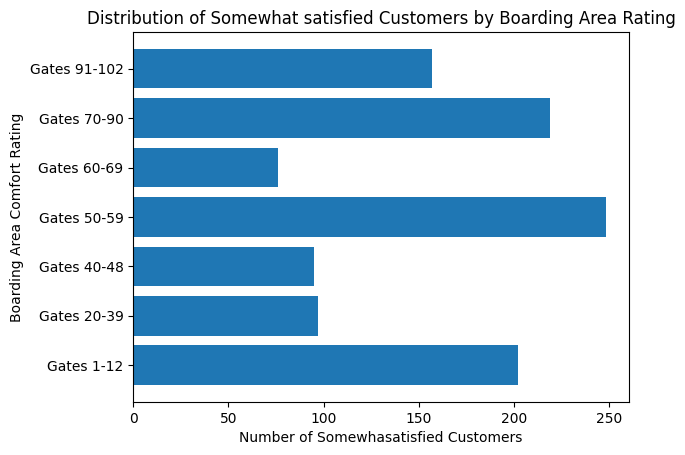

In [34]:
sw_satisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Somewhat satsified']
satisfaction_by_b_a = sw_satisfied_costumers.groupby('boarding_area').count()['satisfaction']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.ylabel('Boarding Area Comfort Rating')
plt.xlabel('Number of Somewhasatisfied Customers')
plt.title('Distribution of Somewhat satisfied Customers by Boarding Area Rating')

Text(0.5, 1.0, 'Distribution of Somewhat satisfied Customers by Boarding Area Rating')

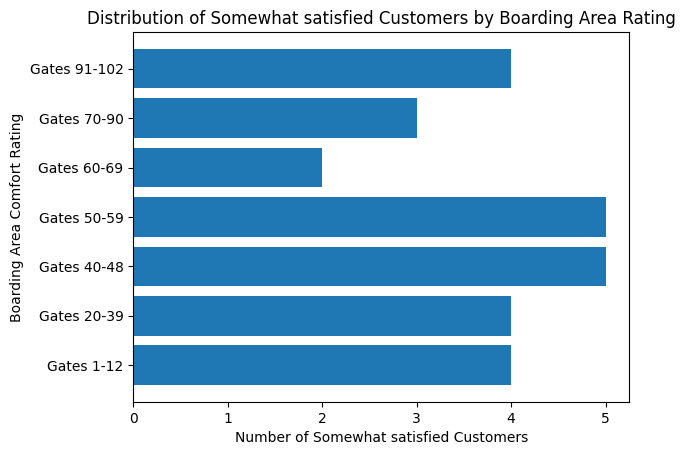

In [35]:
sw_unsatisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Somewhat unsatisfied']
satisfaction_by_b_a = sw_unsatisfied_costumers.groupby('boarding_area').count()['satisfaction']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# group.size().plot(kind='bar')
plt.ylabel('Boarding Area Comfort Rating')
plt.xlabel('Number of Somewhat satisfied Customers')
plt.title('Distribution of Somewhat satisfied Customers by Boarding Area Rating')

Text(0.5, 1.0, 'Distribution of Neutral Customers by Boarding Area Rating')

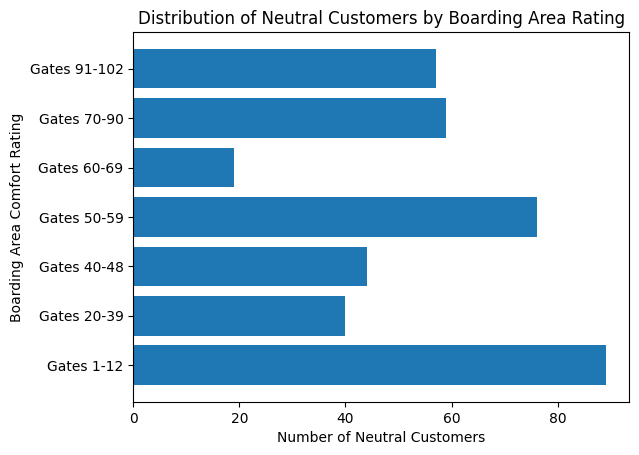

In [36]:
neutral_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Neutral']
satisfaction_by_b_a = neutral_costumers.groupby('boarding_area').count()['satisfaction']
plt.barh(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.ylabel('Boarding Area Comfort Rating')
plt.xlabel('Number of Neutral Customers')
plt.title('Distribution of Neutral Customers by Boarding Area Rating')

Text(0.5, 1.0, 'Distribution of Unsatisfied Customers by Boarding Area Rating')

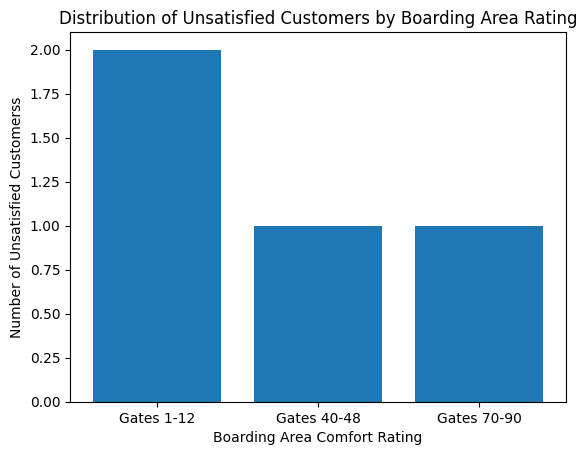

In [37]:
unsatisfied_costumers = new_airlines_dataset[new_airlines_dataset['satisfaction'] == 'Very unsatisfied']
satisfaction_by_b_a = unsatisfied_costumers.groupby('boarding_area').count()['satisfaction']
plt.bar(satisfaction_by_b_a.index, satisfaction_by_b_a.values)


# grp.size().plot(kind='bar')
plt.xlabel('Boarding Area Comfort Rating')
plt.ylabel('Number of Unsatisfied Customerss')
plt.title('Distribution of Unsatisfied Customers by Boarding Area Rating')

Text(0.5, 0, 'Airline')

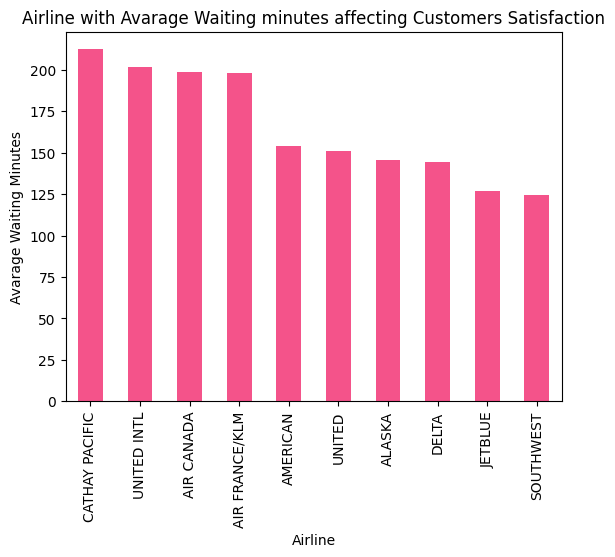

In [38]:
waiting_data = new_airlines_dataset.groupby('airline')['wait_min'].mean().sort_values(ascending=False)
# waiting_data.plot(kind='pie', title='Distribution of avarage waiting minutes affecting customer satisfaction', autopct='%1.1f%%')
waiting_data.plot(kind='bar', color="#F4538A", title='Airline with Avarage Waiting minutes affecting Customers Satisfaction')
plt.ylabel('Avarage Waiting Minutes')
plt.xlabel('Airline')

Text(0, 0.5, '')

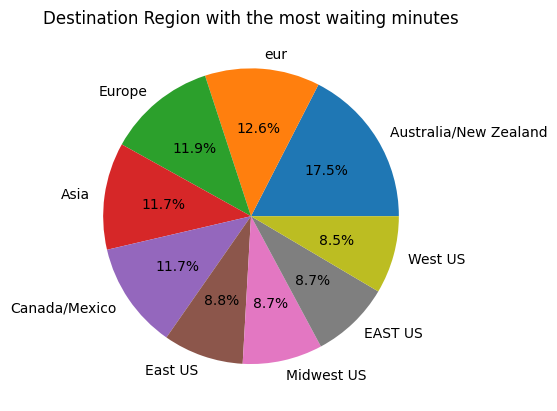

In [147]:
waiting_data = new_airlines_dataset.groupby('dest_region')['wait_min'].mean().sort_values(ascending=False)
waiting_data.plot(kind='pie', title='Destination Region with the most waiting minutes', autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')

In [ ]:
# sns.countplot(new_airlines_dataset, y="cleanliness"  ,hue='satisfaction', orient='y')

In [150]:
# sns.countplot(new_airlines_dataset, y="safety"  ,hue='airline')